In [2]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [4]:
!unzip /content/drive/My Drive/train.json.7z

unzip:  cannot find or open /content/drive/My, /content/drive/My.zip or /content/drive/My.ZIP.


In [3]:
from google.colab import drive
drive.mount('/content/drive')

!cp '/content/drive/My Drive/kaggle.json' ./
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!kaggle competitions download -c statoil-iceberg-classifier-challenge

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
 96% 41.0M/42.9M [00:00<00:00, 53.9MB/s]
100% 42.9M/42.9M [00:00<00:00, 79.5MB/s]
 96% 235M/245M [00:01<00:00, 123MB/s]
100% 245M/245M [00:01<00:00, 130MB/s]
  0% 0.00/37.7k [00:00<?, ?B/s]
100% 37.7k/37.7k [00:00<00:00, 98.3MB/s]


In [4]:
#!unzip /content/sample_submission.csv.7z
!7z e /content/sample_submission.csv.7z


7-Zip [64] 16.02 : Copyright (c) 1999-2016 Igor Pavlov : 2016-05-21
p7zip Version 16.02 (locale=en_US.UTF-8,Utf16=on,HugeFiles=on,64 bits,4 CPUs Intel(R) Xeon(R) CPU @ 2.30GHz (306F0),ASM,AES-NI)

Scanning the drive for archives:
  0M Scan /content/                   1 file, 38566 bytes (38 KiB)

Extracting archive: /content/sample_submission.csv.7z
--
Path = /content/sample_submission.csv.7z
Type = 7z
Physical Size = 38566
Headers Size = 178
Method = LZMA2:17
Solid = -
Blocks = 1

  0%    Everything is Ok

Size:       117951
Compressed: 38566


In [5]:
!7z e /content/test.json.7z
!7z e /content/train.json.7z


7-Zip [64] 16.02 : Copyright (c) 1999-2016 Igor Pavlov : 2016-05-21
p7zip Version 16.02 (locale=en_US.UTF-8,Utf16=on,HugeFiles=on,64 bits,4 CPUs Intel(R) Xeon(R) CPU @ 2.30GHz (306F0),ASM,AES-NI)

Scanning the drive for archives:
  0M Scan /content/                   1 file, 257127394 bytes (246 MiB)

Extracting archive: /content/test.json.7z
--
Path = /content/test.json.7z
Type = 7z
Physical Size = 257127394
Headers Size = 154
Method = LZMA2:24
Solid = -
Blocks = 1

  0%      1% - data/processed/test.json                                 2% - data/processed/test.json                                 3% - data/processed/test.json                                 4% - data/processed/test.json                               

In [13]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

from subprocess import check_output
print(check_output(["ls", "/content/"]).decode("utf8"))


# Any results you write to the current directory are saved as output.

drive
kaggle.json
sample_data
sample_submission.csv
sample_submission.csv.7z
test.json
test.json.7z
train.json
train.json.7z



In [6]:
import pandas as pd 
import numpy as np 
import cv2 # Used to manipulated the images 
np.random.seed(1337) # The seed I used - pick your own or comment out for a random seed. A constant seed allows for better comparisons though

# Import Keras 
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Activation
from keras.layers import Conv2D, MaxPooling2D
from keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
from keras.layers.normalization import BatchNormalization
from keras.optimizers import Adam

Using TensorFlow backend.


In [0]:
df_train = pd.read_json("/content/train.json")
df_test = pd.read_json("/content/test.json")

In [0]:
def get_scaled_imgs(df):
    imgs = []
    
    for i, row in df.iterrows():
        #make 75x75 image
        band_1 = np.array(row['band_1']).reshape(75, 75)
        band_2 = np.array(row['band_2']).reshape(75, 75)
        band_3 = band_1 + band_2 # plus since log(x*y) = log(x) + log(y)
        
        # Rescale
        a = (band_1 - band_1.mean()) / (band_1.max() - band_1.min())
        b = (band_2 - band_2.mean()) / (band_2.max() - band_2.min())
        c = (band_3 - band_3.mean()) / (band_3.max() - band_3.min())

        imgs.append(np.dstack((a, b, c)))
    return np.array(imgs)

In [0]:
Xtrain = get_scaled_imgs(df_train)

In [0]:
Ytrain = np.array(df_train['is_iceberg'])

In [0]:
df_train.inc_angle = df_train.inc_angle.replace('na',0)
idx_tr = np.where(df_train.inc_angle>0)

In [0]:
Ytrain = Ytrain[idx_tr[0]]
Xtrain = Xtrain[idx_tr[0],...]

In [0]:
def get_more_images(imgs):
    
    more_images = []
    vert_flip_imgs = []
    hori_flip_imgs = []
      
    for i in range(0,imgs.shape[0]):
        a=imgs[i,:,:,0]
        b=imgs[i,:,:,1]
        c=imgs[i,:,:,2]
        
        av=cv2.flip(a,1)
        ah=cv2.flip(a,0)
        bv=cv2.flip(b,1)
        bh=cv2.flip(b,0)
        cv=cv2.flip(c,1)
        ch=cv2.flip(c,0)
        
        vert_flip_imgs.append(np.dstack((av, bv, cv)))
        hori_flip_imgs.append(np.dstack((ah, bh, ch)))
      
    v = np.array(vert_flip_imgs)
    h = np.array(hori_flip_imgs)
       
    more_images = np.concatenate((imgs,v,h))
    
    return more_images

In [0]:
Xtr_more = get_more_images(Xtrain) 

In [0]:
Ytr_more = np.concatenate((Ytrain,Ytrain,Ytrain))

**MODEL 1**  - **Got Kaggle score: 0.252**
Train score: 0.031229048673592805
Train accuracy: 0.9907092679770604

In [0]:
### MODEL

In [0]:
def getModel():
    #Build keras model
    
    model=Sequential()
    
    # CNN 1
    model.add(Conv2D(64, kernel_size=(3, 3),activation='relu', input_shape=(75, 75, 3)))
    model.add(MaxPooling2D(pool_size=(3, 3), strides=(2, 2)))
    model.add(Dropout(0.2))

    # CNN 2
    model.add(Conv2D(128, kernel_size=(3, 3), activation='relu' ))
    model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
    model.add(Dropout(0.2))

    # CNN 3
    model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
    model.add(Dropout(0.2))

    #CNN 4
    model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
    model.add(Dropout(0.2))

    # You must flatten the data for the dense layers
    model.add(Flatten())

    #Dense 1
    model.add(Dense(512, activation='relu'))
    model.add(Dropout(0.2))

    #Dense 2
    model.add(Dense(256, activation='relu'))
    model.add(Dropout(0.2))

    # Output 
    model.add(Dense(1, activation="sigmoid"))

    optimizer = Adam(lr=0.001, decay=0.0)
    model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    
    return model

In [15]:
model = getModel()
model.summary()

batch_size = 32
earlyStopping = EarlyStopping(monitor='val_loss', patience=10, verbose=0, mode='min')
mcp_save = ModelCheckpoint('.mdl_wts.hdf5', save_best_only=True, monitor='val_loss', mode='min')
reduce_lr_loss = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=7, verbose=1, epsilon=1e-4, mode='min')






Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 73, 73, 64)        1792      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 128)       0         
____________________________________

/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:1335: UserWarning: `epsilon` argument is deprecated and will be removed, use `min_delta` instead.
  warnings.warn('`epsilon` argument is deprecated and '


In [38]:
history=model.fit(Xtr_more, Ytr_more, batch_size=batch_size, epochs=50, verbose=1, callbacks=[earlyStopping, mcp_save, reduce_lr_loss], validation_split=0.10)

Train on 3971 samples, validate on 442 samples
Epoch 1/50
3971/3971 [==============================] - 3s 636us/step - loss: 0.5540 - acc: 0.7064 - val_loss: 0.3567 - val_acc: 0.8303
Epoch 2/50
3971/3971 [==============================] - 2s 433us/step - loss: 0.3690 - acc: 0.8283 - val_loss: 0.3615 - val_acc: 0.8462
Epoch 3/50
3971/3971 [==============================] - 2s 436us/step - loss: 0.3090 - acc: 0.8595 - val_loss: 0.3781 - val_acc: 0.8100
Epoch 4/50
3971/3971 [==============================] - 2s 440us/step - loss: 0.3243 - acc: 0.8575 - val_loss: 0.2871 - val_acc: 0.8937
Epoch 5/50
3971/3971 [==============================] - 2s 441us/step - loss: 0.2578 - acc: 0.8887 - val_loss: 0.2102 - val_acc: 0.8869
Epoch 6/50
3971/3971 [==============================] - 2s 442us/step - loss: 0.2344 - acc: 0.9038 - val_loss: 0.1844 - val_acc: 0.9321
Epoch 7/50
3971/3971 [==============================] - 2s 440us/step - loss: 0.2222 - acc: 0.9028 - val_loss: 0.2038 - val_acc: 0.9412
E

In [42]:
#model.load_weights(filepath = '.mdl_wts.hdf5')

score = model.evaluate(Xtr_more, Ytr_more, verbose=1)
print('Train score:', score[0])
print('Train accuracy:', score[1])

4413/4413 [==============================] - 1s 177us/step
Train score: 0.031229048673592805
Train accuracy: 0.9907092679770604


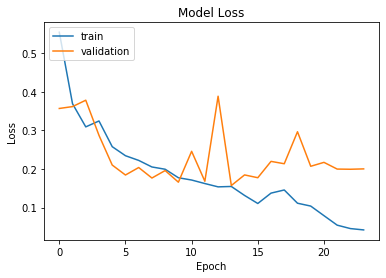

In [43]:
import matplotlib.pyplot as plt
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.title("Model Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend(["train", "validation"], loc="upper left")
plt.show()

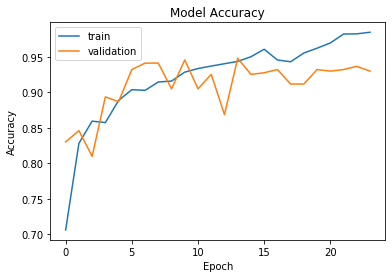

In [44]:
plt.plot(history.history["acc"])
plt.plot(history.history["val_acc"])
plt.title("Model Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend(["train", "validation"], loc="upper left")
plt.show()

**MODEL 2**  Here we used the Batch Normalization - **Got Kaggle score: 0.23**
Train score: 0.06013896667968111
Train accuracy: 0.9780194880253005


In [0]:
def getModel2():
    #Build keras model
    
    model=Sequential()
    
    # CNN 1
    model.add(Conv2D(64, kernel_size=(3, 3),activation='relu', input_shape=(75, 75, 3)))
    model.add(MaxPooling2D(pool_size=(3, 3), strides=(2, 2)))
    model.add(Dropout(0.2))

    # CNN 2
    model.add(Conv2D(128, kernel_size=(3, 3), activation='relu' ))
    model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
    model.add(Dropout(0.2))

    # CNN 3
    model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
    model.add(Dropout(0.2))

    #CNN 4
    model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
    model.add(Dropout(0.2))

    # You must flatten the data for the dense layers
    model.add(Flatten())

    #Dense 1
    model.add(BatchNormalization())
    model.add(Dense(512, activation='relu'))
    model.add(Dropout(0.2))

    #Dense 2
    model.add(Dense(256, activation='relu'))
    model.add(Dropout(0.2))

    # Output 
    model.add(Dense(1, activation="sigmoid"))

    optimizer = Adam(lr=0.001, decay=0.0)
    model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    
    return model

In [0]:
from keras.layers.normalization import BatchNormalization

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 73, 73, 64)        1792      
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
dropout_13 (Dropout)         (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 17, 17, 128)       0         
_________________________________________________________________
dropout_14 (Dropout)         (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 15, 15, 128)      

/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:1335: UserWarning: `epsilon` argument is deprecated and will be removed, use `min_delta` instead.
  warnings.warn('`epsilon` argument is deprecated and '


Train on 3971 samples, validate on 442 samples
Epoch 1/50
3971/3971 [==============================] - 3s 861us/step - loss: 0.5320 - acc: 0.7169 - val_loss: 0.4065 - val_acc: 0.7919
Epoch 2/50
3971/3971 [==============================] - 2s 575us/step - loss: 0.3840 - acc: 0.8121 - val_loss: 1.8312 - val_acc: 0.5656
Epoch 3/50
3971/3971 [==============================] - 2s 580us/step - loss: 0.3097 - acc: 0.8582 - val_loss: 0.3307 - val_acc: 0.8869
Epoch 4/50
3971/3971 [==============================] - 2s 583us/step - loss: 0.2788 - acc: 0.8698 - val_loss: 0.2984 - val_acc: 0.8778
Epoch 5/50
3971/3971 [==============================] - 2s 573us/step - loss: 0.2744 - acc: 0.8753 - val_loss: 0.2167 - val_acc: 0.9253
Epoch 6/50
3971/3971 [==============================] - 2s 572us/step - loss: 0.2487 - acc: 0.9033 - val_loss: 0.5607 - val_acc: 0.8100
Epoch 7/50
3971/3971 [==============================] - 2s 566us/step - loss: 0.2450 - acc: 0.8917 - val_loss: 0.1752 - val_acc: 0.9276
E

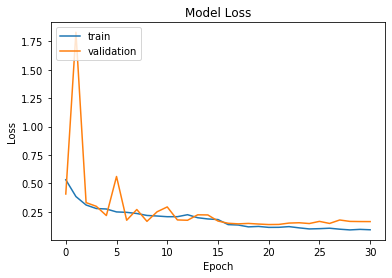

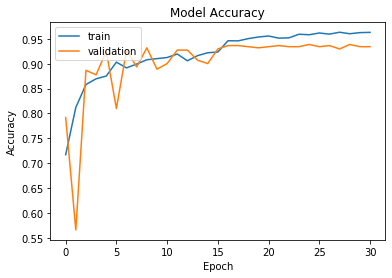

In [21]:
model = getModel2()
model.summary()

batch_size = 32
earlyStopping = EarlyStopping(monitor='val_loss', patience=10, verbose=0, mode='min')
mcp_save = ModelCheckpoint('.mdl_wts.hdf5', save_best_only=True, monitor='val_loss', mode='min')
reduce_lr_loss = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=7, verbose=1, epsilon=1e-4, mode='min')
Xtr_more = get_more_images(Xtrain) 
Ytr_more = np.concatenate((Ytrain,Ytrain,Ytrain))


history=model.fit(Xtr_more, Ytr_more, batch_size=batch_size, epochs=50, verbose=1, callbacks=[earlyStopping, mcp_save, reduce_lr_loss], validation_split=0.10)

#model.load_weights(filepath = '.mdl_wts.hdf5')

score = model.evaluate(Xtr_more, Ytr_more, verbose=1)
print('Train score:', score[0])
print('Train accuracy:', score[1])

import matplotlib.pyplot as plt
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.title("Model Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend(["train", "validation"], loc="upper left")
plt.show()	

plt.plot(history.history["acc"])
plt.plot(history.history["val_acc"])
plt.title("Model Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend(["train", "validation"], loc="upper left")
plt.show()

In [22]:
df_test = pd.read_json('/content/test.json')
df_test.inc_angle = df_test.inc_angle.replace('na',0)
Xtest = (get_scaled_imgs(df_test))
pred_test = model.predict(Xtest)

submission = pd.DataFrame({'id': df_test["id"], 'is_iceberg': pred_test.reshape((pred_test.shape[0]))})
print(submission.head(10))

submission.to_csv('submission2.csv', index=False)

         id  is_iceberg
0  5941774d    0.000474
1  4023181e    0.925625
2  b20200e4    0.004116
3  e7f018bb    0.999997
4  4371c8c3    0.999975
5  a8d9b1fd    0.037584
6  29e7727e    0.011989
7  92a51ffb    0.999992
8  c769ac97    0.000136
9  aee0547d    0.000002


**MODEL 3** We used more Batch Normalization - **Got Kaggle score: 0.168**
Train score: 0.1347969400907708
Train accuracy: 0.946974847042828

In [0]:
def getModel3():
    #Build keras model
    
    model=Sequential()
    
    # CNN 1
    model.add(Conv2D(64, kernel_size=(3, 3),activation='relu', input_shape=(75, 75, 3)))
    model.add(MaxPooling2D(pool_size=(3, 3), strides=(2, 2)))
    model.add(Dropout(0.2))

    # CNN 2
    model.add(Conv2D(128, kernel_size=(3, 3), activation='relu' ))
    model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
    model.add(Dropout(0.2))

    # CNN 3
    model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
    model.add(Dropout(0.2))

    #CNN 4
    model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
    model.add(Dropout(0.2))

    # You must flatten the data for the dense layers
    model.add(Flatten())

    #Dense 1
    model.add(BatchNormalization())
    model.add(Dense(512, activation='relu'))
    model.add(Dropout(0.2))

    #Dense 2
    model.add(BatchNormalization())
    model.add(Dense(256, activation='relu'))
    model.add(Dropout(0.2))

    # Output 
    model.add(Dense(1, activation="sigmoid"))

    optimizer = Adam(lr=0.001, decay=0.0)
    model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    
    return model

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_29 (Conv2D)           (None, 73, 73, 64)        1792      
_________________________________________________________________
max_pooling2d_29 (MaxPooling (None, 36, 36, 64)        0         
_________________________________________________________________
dropout_43 (Dropout)         (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_30 (Conv2D)           (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_30 (MaxPooling (None, 17, 17, 128)       0         
_________________________________________________________________
dropout_44 (Dropout)         (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_31 (Conv2D)           (None, 15, 15, 128)      

/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:1335: UserWarning: `epsilon` argument is deprecated and will be removed, use `min_delta` instead.
  warnings.warn('`epsilon` argument is deprecated and '


Train on 3971 samples, validate on 442 samples
Epoch 1/70
3971/3971 [==============================] - 5s 1ms/step - loss: 0.6542 - acc: 0.6598 - val_loss: 0.8267 - val_acc: 0.5679
Epoch 2/70
3971/3971 [==============================] - 2s 618us/step - loss: 0.4354 - acc: 0.7834 - val_loss: 1.0901 - val_acc: 0.6312
Epoch 3/70
3971/3971 [==============================] - 2s 619us/step - loss: 0.3538 - acc: 0.8330 - val_loss: 0.5057 - val_acc: 0.7353
Epoch 4/70
3971/3971 [==============================] - 2s 619us/step - loss: 0.3383 - acc: 0.8469 - val_loss: 0.4216 - val_acc: 0.7964
Epoch 5/70
3971/3971 [==============================] - 3s 633us/step - loss: 0.2987 - acc: 0.8660 - val_loss: 0.2370 - val_acc: 0.8778
Epoch 6/70
3971/3971 [==============================] - 2s 627us/step - loss: 0.2558 - acc: 0.8852 - val_loss: 0.2539 - val_acc: 0.9118
Epoch 7/70
3971/3971 [==============================] - 2s 615us/step - loss: 0.2585 - acc: 0.8842 - val_loss: 0.3201 - val_acc: 0.8597
Epo

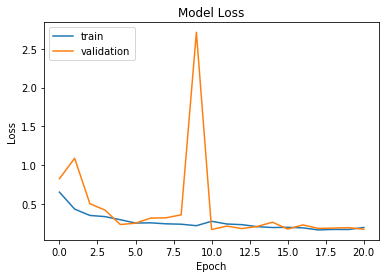

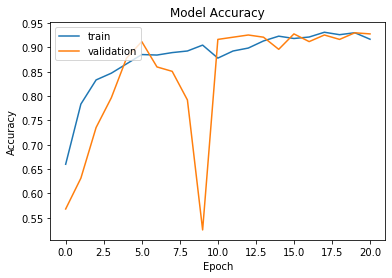

In [30]:
model = getModel3()
model.summary()

batch_size = 32
earlyStopping = EarlyStopping(monitor='val_loss', patience=10, verbose=0, mode='min')
mcp_save = ModelCheckpoint('.mdl_wts.hdf5', save_best_only=True, monitor='val_loss', mode='min')
reduce_lr_loss = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=10, verbose=1, epsilon=1e-4, mode='min')
Xtr_more = get_more_images(Xtrain) 
Ytr_more = np.concatenate((Ytrain,Ytrain,Ytrain))


history=model.fit(Xtr_more, Ytr_more, batch_size=batch_size, epochs=70, verbose=1, callbacks=[earlyStopping, mcp_save, reduce_lr_loss], validation_split=0.10)

#model.load_weights(filepath = '.mdl_wts.hdf5')

score = model.evaluate(Xtr_more, Ytr_more, verbose=1)
print('Train score:', score[0])
print('Train accuracy:', score[1])

import matplotlib.pyplot as plt
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.title("Model Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend(["train", "validation"], loc="upper left")
plt.show()	

plt.plot(history.history["acc"])
plt.plot(history.history["val_acc"])
plt.title("Model Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend(["train", "validation"], loc="upper left")
plt.show()

In [31]:
df_test = pd.read_json('/content/test.json')
df_test.inc_angle = df_test.inc_angle.replace('na',0)
Xtest = (get_scaled_imgs(df_test))
pred_test = model.predict(Xtest)

submission = pd.DataFrame({'id': df_test["id"], 'is_iceberg': pred_test.reshape((pred_test.shape[0]))})
print(submission.head(10))

submission.to_csv('submission5.csv', index=False)

         id  is_iceberg
0  5941774d    0.027577
1  4023181e    0.999289
2  b20200e4    0.134445
3  e7f018bb    0.999986
4  4371c8c3    1.000000
5  a8d9b1fd    0.999086
6  29e7727e    0.035912
7  92a51ffb    0.999999
8  c769ac97    0.001165
9  aee0547d    0.002654
